In [1]:
# --- SETUP ---
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

In [3]:
# --- STEP 1: LOAD DATA ---
# Upload your investment_data.csv (from previous step)
investment_df = pd.read_csv('investment_data.csv')

In [4]:
# --- STEP 2: PREPROCESSING ---
# Focus only on Investor_Name and Startup_ID
grouped = investment_df.groupby('Startup_ID')['Investor_Name'].apply(list).reset_index()

In [5]:
# --- STEP 3: CONSTRUCT CO-INVESTMENT NETWORK ---
G = nx.Graph()

for _, row in grouped.iterrows():
    investors = row['Investor_Name']
    for inv_a, inv_b in combinations(set(investors), 2):
        if G.has_edge(inv_a, inv_b):
            G[inv_a][inv_b]['weight'] += 1
        else:
            G.add_edge(inv_a, inv_b, weight=1)

In [6]:
# --- STEP 4: NETWORK ANALYSIS METRICS ---

# Degree Centrality
deg_centrality = nx.degree_centrality(G)

# Betweenness Centrality
btw_centrality = nx.betweenness_centrality(G, weight='weight')

# Clustering Coefficient
clustering = nx.clustering(G, weight='weight')

# Community Detection (Louvain Method using networkx's greedy modularity)
from networkx.algorithms.community import greedy_modularity_communities
communities = greedy_modularity_communities(G)
node_community = {}
for i, comm in enumerate(communities):
    for name in comm:
        node_community[name] = i

In [7]:
# --- STEP 5: OUTPUT METRICS ---

# Combine metrics into a single DataFrame
metrics_df = pd.DataFrame({
    'Investor': list(G.nodes()),
    'Degree_Centrality': [deg_centrality[node] for node in G.nodes()],
    'Betweenness_Centrality': [btw_centrality[node] for node in G.nodes()],
    'Clustering_Coefficient': [clustering[node] for node in G.nodes()],
    'Community': [node_community[node] for node in G.nodes()]
})

# Sort by Degree Centrality
metrics_df = metrics_df.sort_values(by='Degree_Centrality', ascending=False)
print(metrics_df)

             Investor  Degree_Centrality  Betweenness_Centrality  \
7     Jungle Ventures           1.000000                0.150896   
6           B Capital           0.928571                0.069463   
10      Sequoia India           0.857143                0.077391   
14        Golden Gate           0.857143                0.037055   
4           Wavemaker           0.785714                0.037135   
2         AC Ventures           0.785714                0.016231   
0   Insignia Ventures           0.785714                0.021969   
3     Intudo Ventures           0.785714                0.042648   
5          500 Global           0.785714                0.056728   
12              Surge           0.714286                0.036697   
1       East Ventures           0.642857                0.126625   
9        MDI Ventures           0.571429                0.024829   
8           Alpha JWC           0.571429                0.006706   
13        Monk's Hill           0.500000        

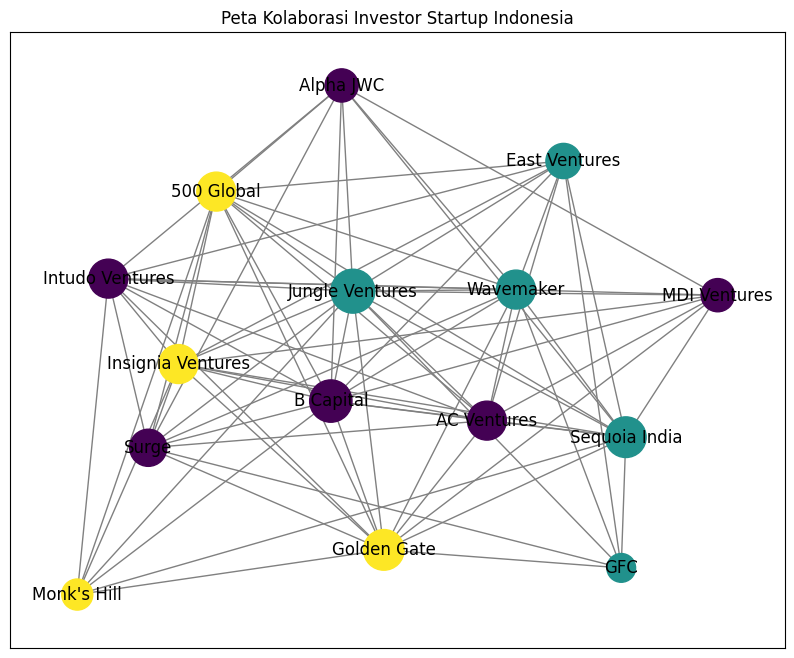

In [16]:
# --- STEP 6: OPTIONAL VISUALIZATION ---
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
node_color = [node_community[node] for node in G.nodes()]
node_size = [1000 * deg_centrality[node] for node in G.nodes()]
nx.draw_networkx(G, pos, with_labels=True, node_color=node_color, node_size=node_size, edge_color='gray')
plt.title("Peta Kolaborasi Investor Startup Indonesia")
plt.show()

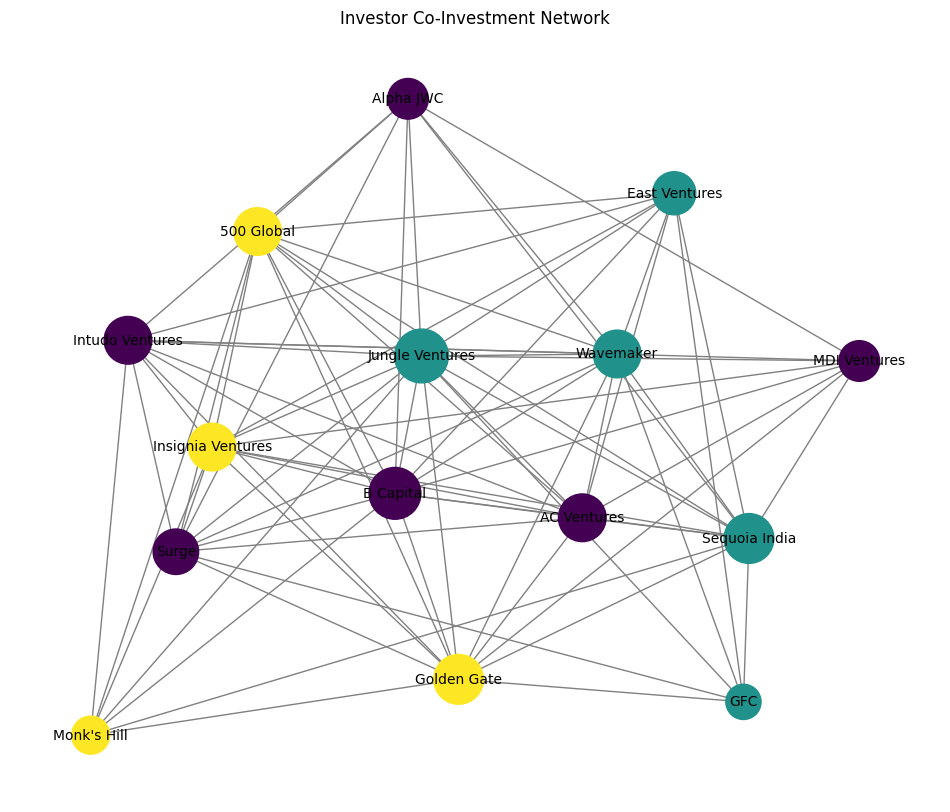

In [21]:
# --- STEP 7: Alternatif Visualisasi Graf Kolaborasi Investor ---

import matplotlib.pyplot as plt
import networkx as nx

def visualize_graph(G, node_community, deg_centrality, title="Investor Co-Investment Network"):
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(G, seed=42)
    node_color = [node_community.get(node, 0) for node in G.nodes()]
    node_size = [1500 * deg_centrality.get(node, 0.01) for node in G.nodes()]

    nx.draw_networkx(
        G, pos, with_labels=True,
        node_color=node_color,
        node_size=node_size,
        edge_color='gray',
        font_size=10
    )

    plt.title(title)
    plt.axis("off")
    plt.show()

# Contoh pemanggilan
visualize_graph(G, node_community, deg_centrality)

In [23]:
# --- STEP 8: Daftar Investor dengan Co-Investment Degree Tertinggi ---

def top_investors_by_degree(deg_centrality, top_n=10):
    sorted_degrees = sorted(deg_centrality.items(), key=lambda x: x[1], reverse=True)
    return sorted_degrees[:top_n]

# Contoh pemanggilan:
top10 = top_investors_by_degree(deg_centrality)
for investor, score in top10:
    print(f"{investor}: {score:.3f}")

Jungle Ventures: 1.000
B Capital: 0.929
Sequoia India: 0.857
Golden Gate: 0.857
Insignia Ventures: 0.786
AC Ventures: 0.786
Intudo Ventures: 0.786
Wavemaker: 0.786
500 Global: 0.786
Surge: 0.714


In [24]:
# --- STEP 9: Cluster/Komunitas Investor ---

def print_communities(communities):
    for i, community in enumerate(communities):
        print(f"Cluster {i+1} ({len(community)} investor):")
        print(", ".join(sorted(community)))
        print()

# Contoh pemanggilan:
from networkx.algorithms.community import greedy_modularity_communities
communities = greedy_modularity_communities(G)
print_communities(communities)

Cluster 1 (6 investor):
AC Ventures, Alpha JWC, B Capital, Intudo Ventures, MDI Ventures, Surge

Cluster 2 (5 investor):
East Ventures, GFC, Jungle Ventures, Sequoia India, Wavemaker

Cluster 3 (4 investor):
500 Global, Golden Gate, Insignia Ventures, Monk's Hill



In [25]:
# Step 10: Apakah East Ventures Lebih Sering Co-Invest dengan Investor Lokal atau Asing ---

def analyze_east_ventures(G):
    if "East Ventures" not in G:
        return {"error": "East Ventures not found in graph."}

    # Dummy list investor lokal
    local_investors = {
        "East Ventures", "AC Ventures", "Alpha JWC", "MDI Ventures",
        "Intudo Ventures", "Wavemaker", "Monk's Hill"
    }

    ev_partners = list(G.neighbors("East Ventures"))
    local_count = sum(1 for i in ev_partners if i in local_investors)
    foreign_count = len(ev_partners) - local_count

    return {
        "Total Co-Investors": len(ev_partners),
        "Local Co-Investors": local_count,
        "Foreign Co-Investors": foreign_count,
        "Co-Investor List": ev_partners
    }

# Contoh pemanggilan:
insight = analyze_east_ventures(G)
for k, v in insight.items():
    print(f"{k}: {v}")

Total Co-Investors: 9
Local Co-Investors: 3
Foreign Co-Investors: 6
Co-Investor List: ['Insignia Ventures', 'AC Ventures', 'Intudo Ventures', 'Wavemaker', '500 Global', 'Sequoia India', 'B Capital', 'GFC', 'Jungle Ventures']
